# Assignment 5 Due: Thursday 10/3

In this assignment you will explore fitting data and assessing how well your fit describes the different data sets.

Assignment Overview:
* Fit data and use $\chi^2$ and the $\chi^2$ test to assess 
* Analyze the efficiency of your data provided different threshold levels using your fit results 

For this assingment you can make use of the numpy, matplotlib, and the scipy packages.

In [182]:
#specify imports here
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import gammaincc
from scipy.integrate import quad
from scipy.stats import norm

# Problem 1: W Boson Mass

Finding the *true* values of a quantity relies on analyzing results for many experiments. One quantity that has been measured many times is the W boson mass see Wikipedia https://en.wikipedia.org/wiki/W_and_Z_bosons and the particle data group (PDG) https://pdg.lbl.gov/2018/listings/rpp2018-list-w-boson.pdf 

**a)** In this problem you will analyze measurements of the W boson from various experiments and determine if the values are consistnet and given this data set, what the best fit value is. Start by reading in the data file Wmass_data.txt, which contains an experiment number, W mass in units of $GeV/c^2$ and its uncertainty.


In [185]:
data=np.loadtxt('/Users/Maxwe/Desktop/Scientific Computing II 2024/Wmass_data.txt')  
experiment=data[:,0]
W_mass=data[:,1]
W_mass_uncertainty=data[:,2]

**b)** Compute the error weighted mean of the W mass and its uncertainty. How does the weighted mean compare to the bold faced average of the PDG?

In [188]:
weights=1/(W_mass_uncertainty**2)
weighted_mean=np.sum(W_mass*weights)/np.sum(weights)
weighted_uncertainty=np.sqrt(1/np.sum(weights))
print(f"Weighted Mean is appoximately: {weighted_mean:.5f} GeV/c^2\nThe uncertainty is: {weighted_uncertainty:.5f} GeV/c^2")

Weighted Mean is appoximately: 80.37915 GeV/c^2
The uncertainty is: 0.01034 GeV/c^2


**c)** Calculate the $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value. The p-value can be calculated using *gammaincc(dof / 2.0, chisq / 2.0)* from *scipy.special*. Based on the p-value are the data consistant?

In [191]:
chi_squared=np.sum(((W_mass-weighted_mean)/W_mass_uncertainty)**2)
dof=len(W_mass)-1  
reduced_chi_squared=chi_squared/dof
p_value=gammaincc(dof/2,chi_squared/2)
print(f"Chi-Squared: {chi_squared:.5f}\nDegrees of Freedom: {dof}\nReduced Chi-Squared: {reduced_chi_squared:.5f}\nP-value: {p_value:.5f}")

Chi-Squared: 8.70684
Degrees of Freedom: 8
Reduced Chi-Squared: 1.08835
P-value: 0.36763


**d)** Plot the measurement number vs. the W mass. Don't forget to include the error bars on the W mass measurements. Then Fit a line of the form $y = p_0$, where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

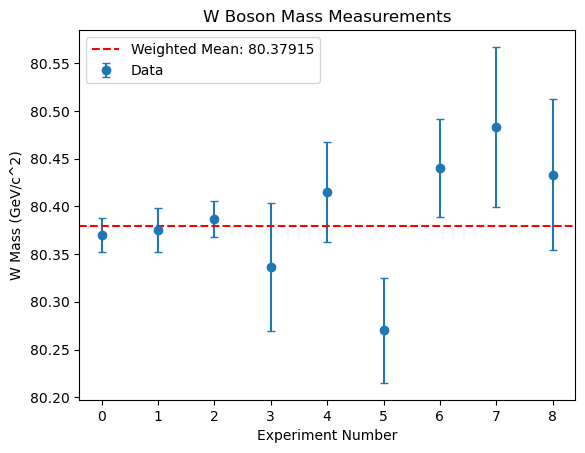

Fitted p0 value is approximately: 80.37915 GeV/c^2
 Compared to the Weighted Mean of 80.37915 GeV/c^2


In [194]:
plt.errorbar(experiment,W_mass,yerr=W_mass_uncertainty,fmt='o',label='Data',capsize=3)
plt.axhline(y=weighted_mean,color='r',linestyle='--',label=f'Weighted Mean: {weighted_mean:.5f}')
plt.xlabel('Experiment Number')
plt.ylabel('W Mass (GeV/c^2)')
plt.title('W Boson Mass Measurements')
plt.legend()
plt.show()
def constant_model_fit_line(x,p0):
    return p0
params,covariance=curve_fit(constant_model_fit_line,experiment, W_mass,sigma=W_mass_uncertainty)
p0_fit=params[0]
print(f"Fitted p0 value is approximately: {p0_fit:.5f} GeV/c^2\n Compared to the Weighted Mean of 80.37915 GeV/c^2")

# Problem 2: Proton Charge Radius

We will carry an identical analysis as we did in Problem 1, but on a different quantity, the proton charge radius. The proton charge radius has been a recent hot topic in the nuclear physics field, as new designed experiments using muonic hydorgen have made very percise measurements of it. See https://www.nature.com/articles/s41586-019-1721-2

There is an approchable video that reviews the history of the proton size and its measurements: https://www.youtube.com/watch?v=C5B_ZfGy4d0

**a)** Import the data set proton_radius_data.txt, which includes the experiment number, the proton charge radius, and its uncertainty measured in $fm$. 

In [197]:
data_proton=np.loadtxt('/Users/Maxwe/Desktop/Scientific Computing II 2024/proton_radius_data.txt')  
experiment_pr=data_proton[:,0]
proton_radius=data_proton[:,1]
proton_radius_uncertainty=data_proton[:,2]

**b)** Compute the error weighted mean of the proton charge radius and its uncertainty. 

You can also compare this to the PDG value (pgs. 6 and 7): https://pdg.lbl.gov/2018/listings/rpp2018-list-p.pdf 

In [200]:
weights_pr=1/proton_radius_uncertainty**2
weighted_mean_pr=np.sum(proton_radius*weights_pr)/np.sum(weights_pr)
weighted_uncertainty_pr=np.sqrt(1/np.sum(weights_pr))
print(f"The weighted mean (Proton Radius): {weighted_mean_pr:.5f} fm\nWith its uncertainty: {weighted_uncertainty_pr:.5f} fm\nThis is compared to a PDG value of: 0.84087±0.00026±0.00029 fm\nThis could be considered within the range of experimental data")

The weighted mean (Proton Radius): 0.84162 fm
With its uncertainty: 0.00033 fm
This is compared to a PDG value of: 0.84087±0.00026±0.00029 fm
This could be considered within the range of experimental data


**c)** Calculate the  $\chi^2$, degrees of freedom, reduced $\chi^2$ and p-value. Based on the p-value are the data consistant? Do you see what all of the fuss is about.

In [203]:
chi_squared_pr=np.sum(((proton_radius-weighted_mean_pr)/proton_radius_uncertainty)**2)
dof_pr=len(proton_radius)-1
reduced_chi_squared_pr=chi_squared_pr/dof_pr
p_value_pr=gammaincc(dof_pr/2,chi_squared_pr/2)
print(f"Chi-squared (Proton Radius) is approximately: {chi_squared_pr:.5f} \nDegrees of freedom is: {dof_pr} \nReduced Chi-squared is: {reduced_chi_squared_pr:.5f} \nWith a p-value of: {p_value_pr:.5f}")

Chi-squared (Proton Radius) is approximately: 222.89862 
Degrees of freedom is: 14 
Reduced Chi-squared is: 15.92133 
With a p-value of: 0.00000


**d)** Plot the measurement number vs. the proton charge radius. Don't forget to include the error bars on the proton charge radius measurements. Then Fit a line of the form  $y = p_0$ , where $p_0$ is a constant parameter.

How does your $p_0$ value compare to the weighted mean you calculated earlier in part b)?

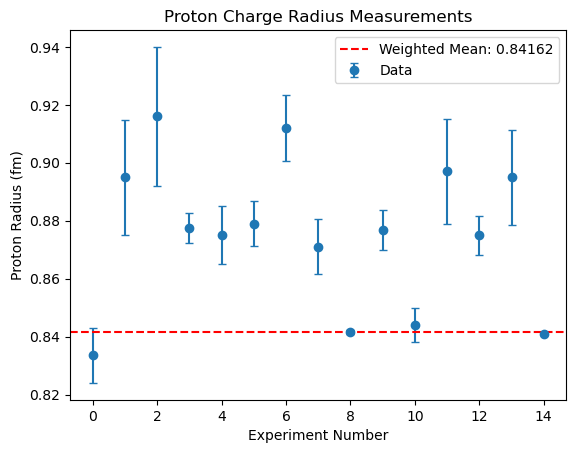

Fitted p0 value (Proton Radius): 0.84162 fm


In [206]:
plt.errorbar(experiment_pr, proton_radius, yerr=proton_radius_uncertainty, fmt='o', label='Data', capsize=3)
plt.axhline(y=weighted_mean_pr, color='r', linestyle='--', label=f'Weighted Mean: {weighted_mean_pr:.5f}')
plt.xlabel('Experiment Number')
plt.ylabel('Proton Radius (fm)')
plt.title('Proton Charge Radius Measurements')
plt.legend()
plt.show()
params_pr,covariance_pr=curve_fit(constant_model_fit_line,experiment_pr,proton_radius,sigma=proton_radius_uncertainty)
p0_fit_pr=params_pr[0]
print(f"Fitted p0 value (Proton Radius): {p0_fit_pr:.5f} fm")

# Problem 3: Selecting Data

In particle physics we sometimes want to measure a particlular particle that is created from many which result from a collision in a particle collider. In recording these collision events we typically measure other particles which are not the ones we are intersted in. The events we are interested in we refer to as our signal, whereas the ones we are not interested in we refer to as a background. 

**a)** The provided data set (Ep_data.txt) contains values of particle energy/momentum (E/p), the number of particles, and the uncertainty on the number of particles. Import the data and plot the number of particles vs. E/p and be sure to include the error bars on the particle counts. 

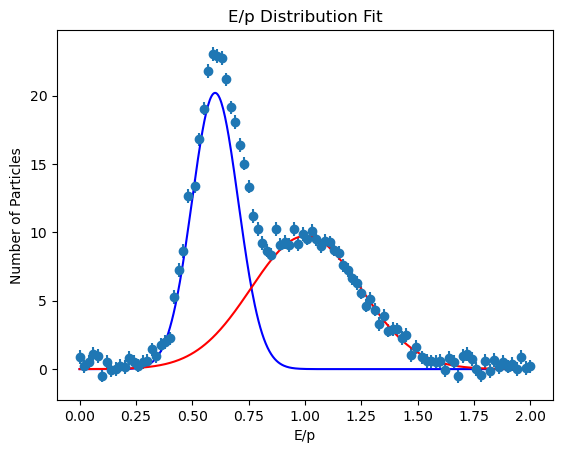

In [211]:
data_Ep=np.loadtxt('/Users/Maxwe/Desktop/Scientific Computing II 2024/Ep_data.txt')  
Ep=data_Ep[:,0]
particles=data_Ep[:,1]
particles_uncertainty=data_Ep[:,2]
def gaussian(x,p1,p2,p3):
    return p1*np.exp(-(x-p2)**2/(2*p3**2))
def sum_of_gaussians(x,p1,p2,p3,p4,p5,p6):
    return gaussian(x,p1,p2,p3)+gaussian(x,p4,p5,p6)
initial_params=[10,0.6,0.1,10,1.0,0.1]
params_fit, params_covariance = curve_fit(sum_of_gaussians, Ep, particles, sigma=particles_uncertainty, p0=initial_params)
p1,p2,p3,p4,p5,p6=params_fit
x_fit=np.linspace(min(Ep),max(Ep),500)
y_fit=sum_of_gaussians(x_fit,*params_fit)
plt.errorbar(Ep, particles, yerr=particles_uncertainty, fmt='o', label='Data')
#plt.plot(x_fit, y_fit, label='Total Fit', color='black')
plt.plot(x_fit, gaussian(x_fit, p1, p2, p3), label='Pions (Gaussian 1)', color='blue')
plt.plot(x_fit, gaussian(x_fit, p4, p5, p6), label='Electrons (Gaussian 2)', color='red')
plt.xlabel('E/p')
plt.ylabel('Number of Particles')
plt.title('E/p Distribution Fit')
#plt.legend()
plt.show()

**b)** You should notice that there appear to be two clear distributions here. One which seems to be centered E/p = 0.6 and another around E/p = 1. The population at the lower E/p represent pions, whereas the population around E/p = 1 are electrons. For this exersice we will treat the pions as a background and the electrons as our signal. We will model each particle type to have a Gaussian distribution. Define two python functions, one that returns a value computed from a Gaussian functions, and another python function that returns a value computed from the sum of two Gaussian functions. Then make a fit to the data using the sum of two Gaussian functions. Each of your Gaussian functions can take the form of:

$G_1(x) = p_1 e^{-(x-p_2)^2/(2p_3)}$

where the $p_1, p_2,$ and $p_3$ are three parameters for the one Gaussian function. You will have 3 more different parameters for the other Gaussian function $G_2(x)$. So we want to fit our E/p distribution with function $G_1(x) + G_2(x)$. The image below shows my fit, with the $G_1(x) + G_2(x)$ fit being the black curve. From this fit I can use the fit parameters to draw $G_1(x)$ (blue curve) and $G_2(x)$ (red curve). 

Note: Did you get a negative value for the gaussian widths from your fit? We know that a negative value is not physical. Try to give some initial parameters for the fit to start with.

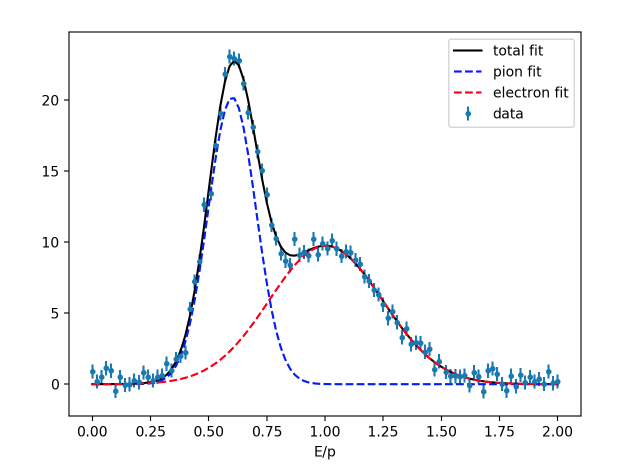

In [221]:
def gaussian(x,p1,p2,p3):
    return p1*np.exp(-(x-p2)**2/(2*p3**2))
def sum_of_gaussians(x,p1,p2,p3,p4,p5,p6):
    return gaussian(x,p1,p2,p3)+gaussian(x,p4,p5,p6)

**c)** Calculate your $\chi^2$, degrees of freedom, reduced $\chi^2$, and p-value for the fit to the data.
Based on those statistics above is this a good fit? Explain.

In [224]:
chi_squared_Ep=np.sum(((particles-sum_of_gaussians(Ep,*params_fit))/particles_uncertainty)**2)
dof_Ep=len(Ep)-len(params_fit)
reduced_chi_squared_Ep=chi_squared_Ep/dof_Ep
p_value_Ep=gammaincc(dof_Ep/2,chi_squared_Ep/2)
print(f"Chi-squared (E/p) is: {chi_squared_Ep:.5f}\nDegrees of freedom is: {dof_Ep}\nReduced Chi-squared is: {reduced_chi_squared_Ep:.5f}\nThe p-value for E/p is: {p_value_Ep:.5f}")

Chi-squared (E/p) is: 108.42094
Degrees of freedom is: 94
Reduced Chi-squared is: 1.15341
The p-value for E/p is: 0.14677


**d)** On the same graph, plot your data, the total fit to it, and the single Gaussian functions computed using the parameter results from your 2 Gaussian function fit (e.g. reproduce my fit figure). 

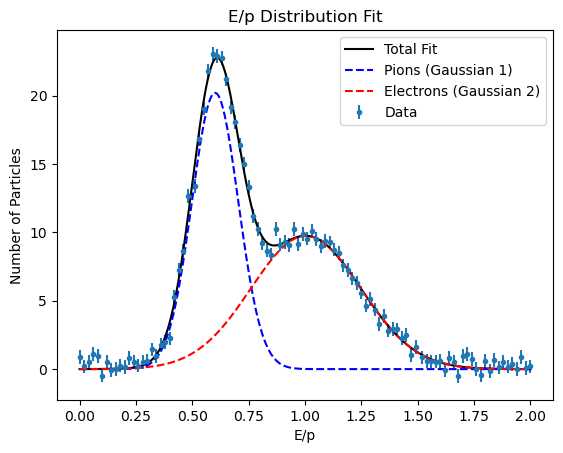

In [227]:
data_Ep=np.loadtxt('/Users/Maxwe/Desktop/Scientific Computing II 2024/Ep_data.txt')  
Ep=data_Ep[:,0]
particles=data_Ep[:,1]
particles_uncertainty=data_Ep[:,2]
def gaussian(x,p1,p2,p3):
    return p1*np.exp(-(x-p2)**2/(2*p3**2))
def sum_of_gaussians(x,p1,p2,p3,p4,p5,p6):
    return gaussian(x,p1,p2,p3)+gaussian(x,p4,p5,p6)
initial_params=[10,0.6,0.1,10,1.0,0.1]
params_fit, params_covariance = curve_fit(sum_of_gaussians, Ep, particles, sigma=particles_uncertainty, p0=initial_params)
p1,p2,p3,p4,p5,p6=params_fit
x_fit=np.linspace(min(Ep),max(Ep),500)
y_fit=sum_of_gaussians(x_fit,*params_fit)
plt.errorbar(Ep,particles,yerr=particles_uncertainty,fmt='.',label='Data')
plt.plot(x_fit,y_fit, label='Total Fit', color='black')
plt.plot(x_fit,gaussian(x_fit, p1, p2, p3),label='Pions (Gaussian 1)',color='blue',linestyle='dashed')
plt.plot(x_fit,gaussian(x_fit, p4, p5, p6),label='Electrons (Gaussian 2)',color='red', linestyle='dashed')
plt.xlabel('E/p')
plt.ylabel('Number of Particles')
plt.title('E/p Distribution Fit')
plt.legend()
plt.show()

**e)** We can use the $E/p$ distribution to try to select the maximum number of electrons while minimizing the number of pions that *leak* into our electron signal. We can do this by requireing our selected sample to be larger than some $E/p$ threshold value. Any data that has an $E/p$ value lower then the threshold we throw it out. In a physics analysis this is called a cut. However we need to be careful, if we place a cut at $E/p$ that is too large we will have a really clean electron sample, but throw away a lot of good electrons. On the other hand if we make the $E/p$ cut too low we will keep most of our electrons, but let in a lot of background (pions). So we must compormise between clean data and statistics. To do this lets calculat the total number of electrons we have from $0.0 < E/p < 2$. This can be obtained by integrating (you can use scipy integrators, I used *integrate.quad* when doing this exersise)the electron contribution from our fit. We will call this number e_tot. Do a similar thing for the total pions and call that number pi_tot. 

For 10 equally spaced E/p thresholds between 0.3 and 0.8, calculate the number of electrons that are above each of the thresholds, we can call this array e_sig and can be obtained by integrating from the E/p threshold value to the E/p = 2. Do a similar thing for the pion distribution. 

Below is the your graph in part f) should look like.

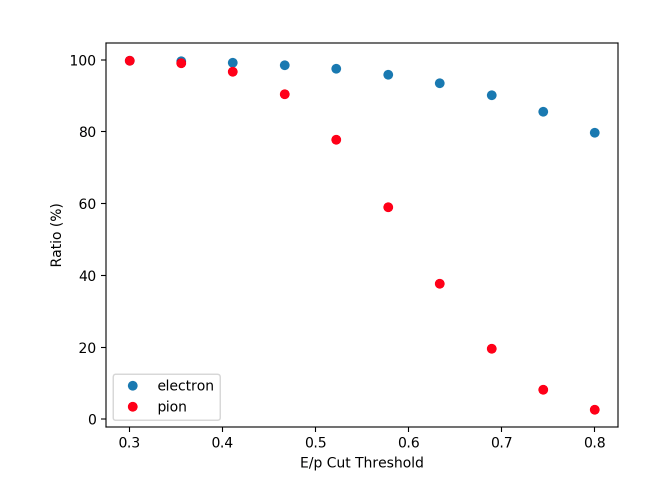



In [230]:
x_min=0.0
x_max=2.0
e_tot,_=quad(gaussian,x_min,x_max,args=(p4,p5,p6))
pi_tot,_=quad(gaussian,x_min,x_max,args=(p1,p2,p3))
thresholds=np.linspace(0.3,0.8,10)
e_sig=[]
pi_sig=[]

**f)** Plot the ratios e_sig/e_tot and pi_sig/pi_tot as a function of E/p threshold on the same graph. 

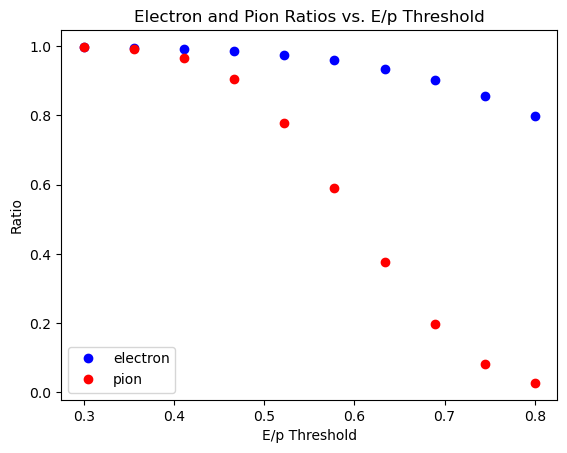

In [233]:
for threshold in thresholds:
    e_above_thresh,_=quad(gaussian,threshold,x_max,args=(p4,p5,p6))
    pi_above_thresh,_=quad(gaussian,threshold,x_max,args=(p1,p2,p3))
    e_sig.append(e_above_thresh)
    pi_sig.append(pi_above_thresh)
e_sig=np.array(e_sig)
pi_sig=np.array(pi_sig)
e_sig_ratio=e_sig/e_tot
pi_sig_ratio=pi_sig/pi_tot
plt.plot(thresholds,e_sig_ratio,label='electron',color='blue',marker='o',linestyle='none')
plt.plot(thresholds, pi_sig_ratio, label=r'pion',color='red',marker='o',linestyle='none')
plt.xlabel('E/p Threshold')
plt.ylabel('Ratio')
plt.title('Electron and Pion Ratios vs. E/p Threshold')
plt.legend()
plt.show()

**g)** When the e_sig/etot ratio is 90%, how what percentage of the pion distribution is contaminating our electron sample?

In [242]:
print("Analysis:")
pion_contamination = pi_sig_ratio[threshold_90_index] * 100  # percentage
print(f"E/p threshold for 90% electron signal: {threshold_90:.2f}\nPion contamination at this threshold: {pion_contamination:.2f}%")
thresholds=np.linspace(0.3,0.8,10)
print(f"Thresholds: {thresholds}\nElectron retention ratio (e_sig/e_tot): {e_sig_ratio}\nPion contamination ratio (pi_sig/pi_tot): {pi_sig_ratio}")
threshold_90_index=np.where(e_sig_ratio>=0.9)[0][0]
threshold_90=thresholds[threshold_90_index]
pion_contamination_at_90=pi_sig_ratio[threshold_90_index]*100  
print(f"At an E/p threshold of {threshold_90:.2f}, we retain 90% of the electrons, with {pion_contamination_at_90:.2f}% pion contamination.")

Analysis:
E/p threshold for 90% electron signal: 0.30
Pion contamination at this threshold: 99.83%
Thresholds: [0.3        0.35555556 0.41111111 0.46666667 0.52222222 0.57777778
 0.63333333 0.68888889 0.74444444 0.8       ]
Electron retention ratio (e_sig/e_tot): [0.99808512 0.99611986 0.99252374 0.98627558 0.97596756 0.95982009
 0.93580197 0.9018801  0.85638901 0.79846225]
Pion contamination ratio (pi_sig/pi_tot): [0.99828532 0.99149909 0.96762356 0.90443651 0.7786211  0.59011338
 0.37756918 0.19722385 0.08206919 0.02674183]
At an E/p threshold of 0.30, we retain 90% of the electrons, with 99.83% pion contamination.


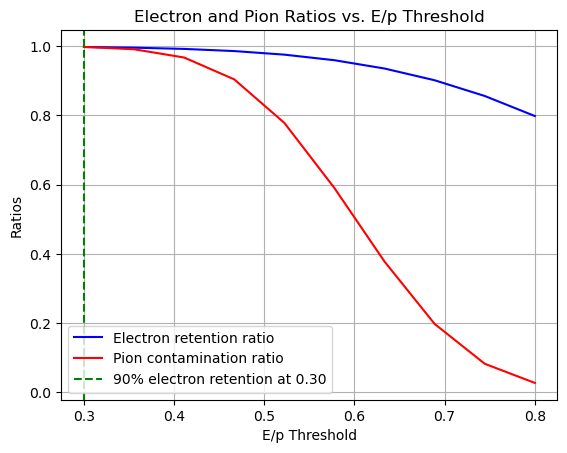

In [238]:
threshold_90_index=np.where(e_sig_ratio>=0.9)[0][0]
threshold_90=thresholds[threshold_90_index]
plt.plot(thresholds,e_sig_ratio,label='Electron retention ratio',color='blue')
plt.plot(thresholds,pi_sig_ratio,label='Pion contamination ratio',color='red')
plt.axvline(x=threshold_90,color='green',linestyle='--',label=f'90% electron retention at {threshold_90:.2f}')
plt.xlabel('E/p Threshold')
plt.ylabel('Ratios')
plt.title('Electron and Pion Ratios vs. E/p Threshold')
plt.legend()
plt.grid(True)
plt.show()